In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB

In [35]:
data = {
    'Age': [22, 25, 47, 52, 46, 56, 55, 60, 23, 34],
    'Salary': [25000, 40000, 47000, 52000, 49000, 60000, 58000, 62000, 30000, 42000],
    'Buys_Computer': ['No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No']
}

In [36]:
df = pd.DataFrame(data)
print(df)

   Age  Salary Buys_Computer
0   22   25000            No
1   25   40000            No
2   47   47000           Yes
3   52   52000           Yes
4   46   49000           Yes
5   56   60000           Yes
6   55   58000           Yes
7   60   62000           Yes
8   23   30000            No
9   34   42000            No


In [37]:
X = df[['Age', 'Salary']]
Y = df["Buys_Computer"]

In [38]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [39]:
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [40]:
y_pred = model.predict(x_test)
print("Prediction : ", y_pred)

Prediction :  ['No' 'No' 'Yes']


In [41]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy", accuracy)

Accuracy 1.0


In [42]:
# Precision	Out of all the times the model said “Yes”, how many were actually “Yes”?
# Recall	Out of all the actual “Yes” cases, how many did the model correctly find?
# F1-Score	A balance between Precision and Recall (good if you want both high).
# Support	The number of actual examples for that class in your test data.
# Accuracy	Total correct predictions ÷ total predictions.
# Macro avg	Average of all metrics (treats all classes equally).
# Weighted avg	Average weighted by the number of samples per class (good if classes are imbalanced).

In [43]:
classification_report = classification_report(y_test, y_pred)
print("Classification Report :", classification_report)

Classification Report :               precision    recall  f1-score   support

          No       1.00      1.00      1.00         2
         Yes       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [44]:
new_data = pd.DataFrame([[30, 500000], [65, 100000]], columns=['Age', 'Salary'])
print(model.predict(new_data))


['No' 'Yes']


Blue ones are no 
Red ones are yes

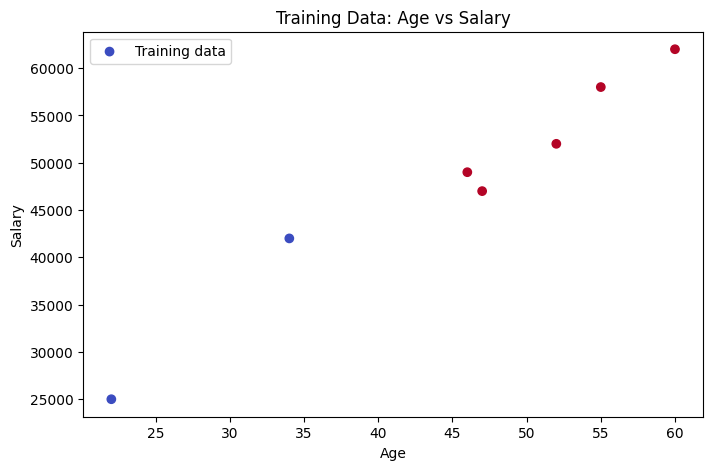

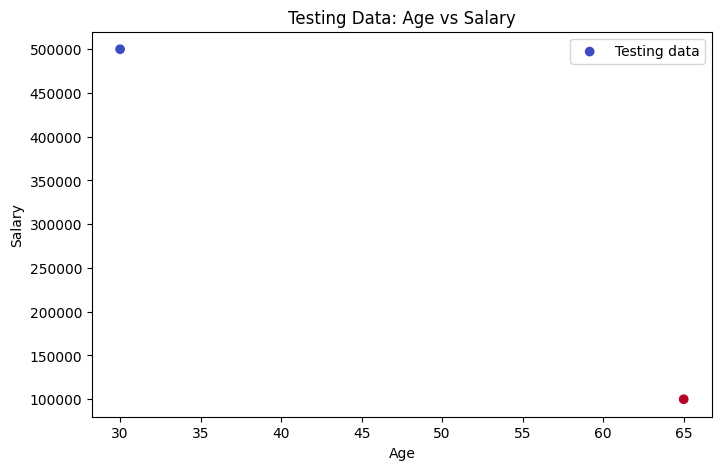

In [46]:
# Training data
plt.figure(figsize=(8,5))
plt.scatter(x_train['Age'], x_train['Salary'], 
            c=(y_train == 'Yes'), cmap='coolwarm', label='Training data')
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Training Data: Age vs Salary")
plt.legend()
plt.show()

# Testing data
plt.figure(figsize=(8,5))
plt.scatter(new_data['Age'], new_data['Salary'], 
            c=(model.predict(new_data) == 'Yes'), cmap='coolwarm', label='Testing data')
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Testing Data: Age vs Salary")
plt.legend()
plt.show()
